In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# la = pd.read_csv("../data_collection/Los Angeles_restaurant.csv")
# sd = pd.read_csv("../data_collection/San Diego_restaurant.csv")
# sf = pd.read_csv("../data_collection/San Francisco_restaurant.csv")
# oc = pd.read_csv("../data_collection/Orange County_restaurant.csv")

la = pd.read_csv("https://raw.githubusercontent.com/jacobh310/food_nlp/master/data_collection/Los%20Angeles_restaurant.csv")
sd = pd.read_csv("https://raw.githubusercontent.com/jacobh310/food_nlp/master/data_collection/San%20Diego_restaurant.csv")
sf = pd.read_csv("https://raw.githubusercontent.com/jacobh310/food_nlp/master/data_collection/San%20Francisco_restaurant.csv")
oc = pd.read_csv("https://raw.githubusercontent.com/jacobh310/food_nlp/master/data_collection/Orange%20County_restaurant.csv")
at = pd.read_csv('https://raw.githubusercontent.com/jacobh310/food_nlp/master/data_collection/Atalanta_restaurant.csv')
ny = pd.read_csv('https://raw.githubusercontent.com/jacobh310/food_nlp/master/data_collection/New%20York_restaurant.csv')

In [3]:
df = pd.concat([la,sd,ny,oc,sf, at])

In [4]:
df.shape 

(1059740, 5)

## Data Cleaning, Wrangling and Prepping

In [5]:
df['rating'] = df['rating']/10  # Convert ratings from 50 base to 5 base


In [6]:
url = df[df['restaurant'].str.contains('http')]['restaurant']

In [7]:
clean = url.str.split('Reviews').str[1].str.split('-').str[-2].str.rstrip().str.replace('_',' ')

In [8]:
def clean_name(col):
    if 'http' in col:
        col = col.split('Reviews')[1]
        col = col.split('-')[-2]
        col = col.replace('_',' ')
        return col
    else:
        return col
   

In [9]:
df['restaurant'] = df['restaurant'].apply(lambda x: clean_name(x))
df['restaurant'] = df['restaurant'].apply(lambda x: 'In-N-Out Burger' if 'In N Out' in x else x)

In [16]:
no_reviews = df.drop(columns=['review', 'user_name'])
no_reviews.to_csv('no_reviews.csv')

## Exploratory Data Analysis

### 1) Numerical Data 

**Descriptive Statistics on Rating Across all restaurants**

In [ ]:
df['rating'].describe()

count    1.059740e+06
mean     4.312965e+00
std      9.530111e-01
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
df['restaurant'].value_counts().describe()

count     4431.000000
mean       239.164974
std        760.472906
min          2.000000
25%         36.000000
50%         86.000000
75%        224.500000
max      34560.000000
Name: restaurant, dtype: float64

In [ ]:
df['restaurant'].value_counts()

La Puerta                 34560
Piccola Cucina Osteria    17001
NY Pizza Suprema          11826
Katz's Deli                9900
Z & Y Restaurant           8300
                          ...  
Poke Chop                     6
Louisiana Purchase            6
Ciao Ciao Piadina             6
The Presley                   5
Izakaya Hachi                 2
Name: restaurant, Length: 4431, dtype: int64

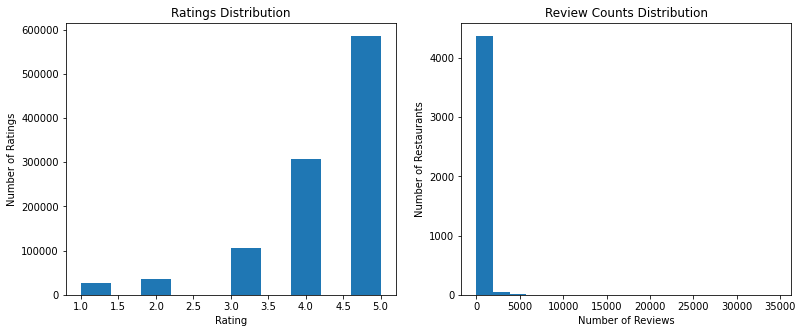

In [ ]:

review_counts = df['restaurant'].value_counts()


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(13,5))
axes[0].hist(df['rating'])
axes[0].set_title('Ratings Distribution')
axes[0].set_ylabel('Number of Ratings')
axes[0].set_xlabel('Rating')

axes[1].hist(review_counts, bins=18)
axes[1].set_title('Review Counts Distribution')
axes[1].set_ylabel('Number of Restaurants')
axes[1].set_xlabel('Number of Reviews')


plt.show()

- Ratings are skewed to the left. The avverage review is 4.23 despite the max being a 5. The media being a 5 indicates that, at least 50 percent of reviews are 5 stars. 
- More majority of the reviews are held by the popular restuaurants. This is evident when looking at the mean and the 75 percentile. The average amount of revieews per restuarant is 64.86 while the 75th percentile is only 44.

### 2) Categorical Plots 

In [ ]:
avg_rating_restaurant = df.groupby('restaurant')['rating'].mean()
top_by_count = df['restaurant'].value_counts().head(20)

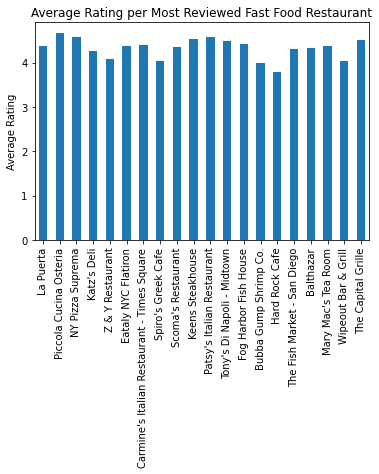

In [ ]:
avg_rating_restaurant[top_by_count.index].plot.bar()
plt.title('Average Rating per Most Reviewed Fast Food Restaurant')
plt.ylabel('Average Rating')
plt.show()

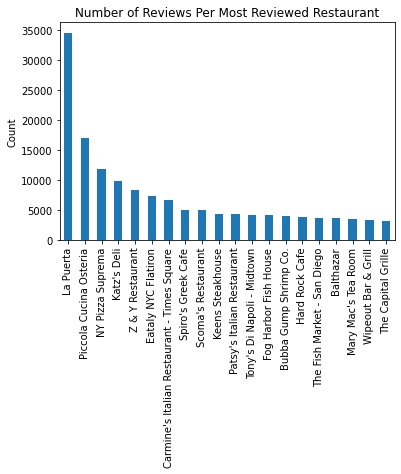

In [ ]:
top_by_count.plot.bar()
plt.title('Number of Reviews Per Most Reviewed Restaurant')
plt.ylabel('Count')
plt.show()

In [ ]:
x = df['review'].apply(lambda x: x.split()).apply(len)

In [ ]:
x.describe().apply(lambda x: format(x, 'f'))

count    1059740.000000
mean          41.720761
std           19.136592
min            1.000000
25%           36.000000
50%           45.000000
75%           45.000000
max         1865.000000
Name: review, dtype: object

# Review Exploration

In [ ]:
for review in df.sample(n=20)['review']:
  print(f"Review: {review}\n")

Review: Scotty is right there working on the floor and I must say he is quality-minded. Not only is service great but food comes out fast. Even more important is that it is really good. I had a waffle with bacon and both were very good....More

Review: Came here with a group of 20. Being Italian, there food was exceptional! Had the eggplant parm and apple gorgonzole salad between two of us. It was very tasty. Would definitely recommend this place however the issue we had was they gave us one bill...More

Review: We had a marvelous experience at Hunan Home.  The food is exemplary.  The prices are right in the "ballpark" for most customers.  The service and personal touch are there.  We chose this restaurant from other reviews.  Seeing many customers as we walked in was encouraging....More

Review: This place is absolutely wonderful! The staff, owner, and patrons are all amazingly friendly and a joy to have a meal with. 

The food is amazing, especially the garlic naan. If you go, order 

- Alot of the samples have have "...More at the end"

In [ ]:
df['review'] = df['review'].str.split('..More').str[0]

In [ ]:
df['review'].str.contains('..More').value_counts()

False    1059740
Name: review, dtype: int64